# Image pre-processing 2
Some work in progress with partial, rectangular blurring


In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import glob
import math
import random
random.seed(21)

%matplotlib inline

In [2]:
IMAGE_FOLDER = '../../processed/orig/'
OUTPUT_FOLDER = '../../processed_rectblur/'
OUTPUT_DIM = 200

In [3]:
# Load files from input folder
dir_content = glob.glob(IMAGE_FOLDER+'*.jpg')
input_filenames = [x.split('/')[-1] for x in dir_content]

In [4]:
def applyRectangularBlur(img_orig):
    allowed_horizontal = [0,175]
    allowed_vertical = [35,150]
    
    num_blurs = random.randint(4,6)

    img = img_orig.copy()
    masks = []
    
    for i in range(num_blurs):
        d = random.randint(35,50) # +d is the width/height from the starting x/y
        blur_size = random.choice([5,7,9]) # how much blur should be applied
        
        y = random.randint(allowed_horizontal[0],allowed_horizontal[1])
        x = random.randint(allowed_vertical[0],allowed_vertical[1])

#         print(x,y,d)
        
        selection = img[ x:x+d, y:y+d ,:]
#         selection[ selection[:,:,0] > 0 ] = 255
        selection = cv.GaussianBlur(selection, (blur_size, blur_size),0)
        img[x:x+d, y:y+d ,:] = selection
        
    return img



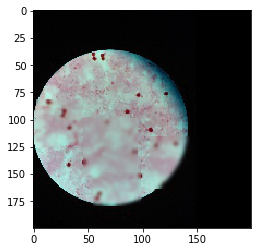

In [5]:
img_orig = cv.imread(IMAGE_FOLDER+input_filenames[0])
img_rectblur = applyRectangularBlur(img_orig)
plt.imshow(img_rectblur)

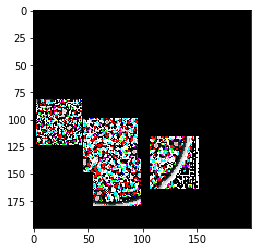

In [6]:
plt.imshow(img_orig-img_rectblur)

In [7]:
# %%time
# Perform reading, resizing, blurring, saving

counter = 0
num_files = len(input_filenames)

step = math.floor(0.1*num_files)

# input_filenames = input_filenames[0:10]

for file in input_filenames:
    
    # Create an empty black output image
    blur_out_img = np.zeros((OUTPUT_DIM, OUTPUT_DIM,3))
    orig_out_img = np.zeros((OUTPUT_DIM, OUTPUT_DIM,3))
    
    # Read the raw image into memory
    raw_img = cv.imread(IMAGE_FOLDER+file)

    # Scale the original image to fit in the output format
    scale = OUTPUT_DIM/max(raw_img.shape[0],raw_img.shape[1])
    img = cv.resize(raw_img, (0,0), fx=scale, fy=scale)
        
    # Apply blur
    blurred_img = applyRectangularBlur(img)
    
    # Fit the scaled blurred image into the empty black image (as zero padding)
    blur_out_img[ :blurred_img.shape[0], :blurred_img.shape[1] ] = blurred_img
    orig_out_img[ :img.shape[0], :img.shape[1] ] = img
    
    cv.imwrite(OUTPUT_FOLDER+'blur/'+file, blur_out_img)
    cv.imwrite(OUTPUT_FOLDER+'orig/'+file, orig_out_img)
    
    if counter % step == 0:
        percentage = round( counter / num_files,1 )
        print( '{} done'.format(percentage) )
    counter += 1
        
print('done.')

0.0 done
0.1 done
0.2 done
0.3 done
0.4 done
0.5 done
0.6 done
0.7 done
0.8 done
0.9 done
1.0 done
done.


In [8]:
# result_array = img.copy()

# for blur_point in blur_points:
    
#     x = random.randint(allowed_horizontal[0],allowed_horizontal[1])
#     y = random.randint(allowed_vertical[0],allowed_vertical[1])
#     d = blur_radius
    
#     selection = img[ x:x+d, y:y+d ,:]
# #     selection[ selection[:,:,0] > 0 ] = 255
#     selection = cv.blur(selection, (5,5))
    
#     img[x:x+d, y:y+d ,:] = selection
    
# #     print(x,y,d)
#     print(selection.shape)
#     plt.imshow(selection)

# CIRCULAR BLUR THING
# https://stackoverflow.com/questions/46883245/blur-from-opencv-in-region-of-interest
# https://stackoverflow.com/questions/24267558/point-detection-and-circle-area-selection

# print(blur_point)

# tl_x = blur_point[0]-blur_radius
# tl_y = blur_point[1]+blur_radius
# br_x = blur_point[0]+blur_radius
# br_y = blur_point[1]-blur_radius

# mask = np.zeros( (OUTPUT_DIM, OUTPUT_DIM,3), np.uint8)
# cv.circle(tempImg, blur_point, blur_radius, (255, 255, 255), -100)
# cv.circle(mask, blur_point, blur_radius, (255,255,255), -100)
# tempImg [y:y+h, x:x+w] = cv.blur(tempImg [y:y+h, x:x+w] ,(23,23))

# # create the circle in the mask and in the tempImg, notice the one in the mask is full
# cv.circle(tempImg , blur_point, blur_radius, (0, 255, 0), 5)
# cv.circle(mask , blur_point, blur_radius, (255), -1)


# mask_inv = cv.bitwise_not(mask)
# img1_bg = cv.bitwise_and(img,img,mask = mask_inv)
# img2_fg = cv.bitwise_and(tempImg,tempImg,mask = mask)
# dst = cv.add(img1_bg,img2_fg)

# # # Apply mask (using bitwise & operator)
# # result_array = result_array & mask

# plt.imshow(dst)